In [1]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#from jetson.utils import videoSource, videoOutput
import numpy as np



def correct_dist(initial_img):

    k = [[1.15422732e+03, 0.00000000e+00, 6.71627794e+02], [0.00000000e+00, 1.14818221e+03, 3.86046312e+02],[0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]
    k = np.array(k)
    # Distortion Matrix
    dist = [[-2.42565104e-01, -4.77893070e-02, -1.31388084e-03, -8.79107779e-05, 2.20573263e-02]]
    dist = np.array(dist)
    img_2 = cv2.undistort(initial_img, k, dist, None, k)

    return img_2

def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def flip_image(img):
    return cv2.flip(img,0)

def get_roi_image(img):
    """
    Our roi is the bottom of the image.
    """
    h, w, channels = img.shape
    # this is horizontal division
    half2 = h//2
    return img[half2:, :]

def predict_slopes(img):
    assert(len(img.shape)==2)
    y, x = np.where(img!=0)
    m, b = np.polyfit(x, y, 1)
    return m, b

def find_green_lanes(img):
    """
    Get the green lanes from the image 
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    ## mask of green (36,25,25) ~ (86, 255,255)
    mask = cv2.inRange(hsv, (36, 25, 25), (90, 255,255))
    ## slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    return green

def rgb_to_grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

def get_x_value_for_given_y(line):
    list1 = []
    for i in range(0,line.shape[0], 15):
        my_list = line[i:i+15]
        if all(c > 0 for c in my_list):
            list1.append(i) 
    return list1      

def get_x_value_for_given_y(img,stepy,x1,x2,height):
    """
    Get the x pixel value for the given y pixel where the lanes are green
    """
    y=range(0,img.shape[0], stepy)
    final_dict = {}
    for y_index in y:
        horizontal_line = img[y_index,x1:x2]
        list1 = []
        for i in range(0, horizontal_line.shape[0], 15):
            my_list = horizontal_line[i : i + 15]
            if all(c > 0 for c in my_list):
                list1.append(i)
        final_dict[y_index] = list1
    result_dict = {key: value for key, value in final_dict.items() if isinstance(value, list) and len(value) > 0 and value[-1]-value[0]>200}
    return result_dict

def get_x_value_for_given_lanes(lane_dict,x1):
    points = {}
    for point_y in lane_dict.keys():
        point_list = lane_dict[point_y]
        if len(point_list)>0:
            points_tuple=(x1+point_list[0],x1+point_list[-1])
            points[point_y] = (points_tuple)
    return points

def get_midpoint_for_given_lanes(lane_dict):
    first_key = next(iter(lane_dict))
    arr = np.array(lane_dict[first_key])
    average=(np.sum(arr)/len(lane_dict[first_key]))
    x,y = average,first_key
    return x,y

#camera = videoSource("csi://0")  # '/dev/video0' for V4L2
#display = videoOutput("display://0")  # 'my_video.mp4' for file
stepy = 50
x1 = 0
x2 = 1280


X 780.0
Y 250


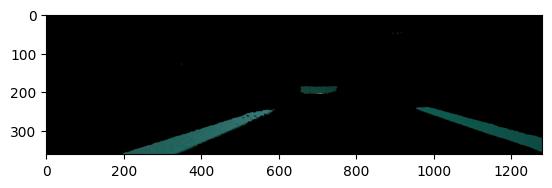

In [2]:
try:
    count = 1
    while True:
        img = cv2.imread("image1.jpg")
        img = flip_image(img)
        #img = camera.Capture()
        img = correct_dist(img)
        img = bgr2rgb(img)
        img = get_roi_image(img)      
        h,w,channels = img.shape
        img = find_green_lanes(img)
        plt.imshow(img)
        img = rgb_to_grayscale(img)
        xy_dict = get_x_value_for_given_y(img,stepy,x1,x2,h)
        xy_dict = get_x_value_for_given_lanes(xy_dict, x1)
        x, y = get_midpoint_for_given_lanes(xy_dict)
        print("X",x)
        print("Y",y)
        break
        

        #img = cv2.imread("669.jpg")        

               
except Exception as e:
    print("Exception Occured"+ str(e))